**Data Exploration and Data Analysis of the Spotify Data Set**

Research Question: Can the valence of a song be predicted by the scores in danceability?

And what if we choose the duration as a predictor for valence?

# 1.&nbsp;Data Importing

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data1 = data.copy()

# 2.&nbsp;Data Cleaning (overview)

Each row represents a song.

There are 16 columns. 13 of which are song attributes, one column for song name, one for artist, and a column called "target" which is the label for the song.

Here are the 13 track attributes: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence.

In [ ]:
data1.info()

data1.describe() 



In [8]:
print(data1["song_title"].value_counts())

River                 3
Jack                  3
Mask Off              2
Be My Baby            2
Oblivion              2
                     ..
L'Amour Parfait       1
I Follow Rivers       1
From Nowhere          1
I Need You            1
I Wanna Get Better    1
Name: song_title, Length: 1956, dtype: int64


In [9]:
print(data1.head(5))

##duration: transform it from ms to seconds

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1   

Research Question: Can the valence of a song be predicted by the scores in danceability?

And what if we also include the duration as a second continuous predictor?

# 3.&nbsp;Data Cleaning (interpretability)

In [10]:
data1.head(2)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.02190,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino


In [21]:
#change the song duration from ms to seconds

duration_ms = data1["duration_ms"]
duration_sec = []

for i in range(len(duration_ms)):
  minutes = round(duration_ms[i] / 60000,2)
  duration_sec.append(minutes)

print(duration_sec)



[3.41, 5.45, 3.1, 3.32, 6.55, 4.19, 4.02, 5.83, 3.38, 3.78, 5.97, 5.41, 5.95, 4.05, 4.12, 3.14, 4.51, 7.47, 3.26, 3.57, 4.15, 5.13, 4.78, 2.21, 3.39, 3.42, 3.32, 3.14, 3.81, 3.1, 3.68, 4.75, 3.55, 4.68, 3.88, 3.84, 2.93, 3.43, 3.56, 3.95, 5.41, 3.1, 3.05, 6.31, 3.91, 3.55, 6.44, 2.92, 4.21, 9.61, 4.02, 3.74, 3.59, 4.78, 4.25, 3.56, 4.72, 3.97, 1.89, 5.19, 4.79, 3.76, 4.89, 3.87, 3.73, 3.11, 4.65, 3.56, 5.57, 2.23, 5.52, 3.28, 2.59, 4.0, 2.67, 4.89, 6.45, 3.87, 6.3, 3.28, 3.12, 3.69, 3.35, 4.3, 7.67, 4.59, 7.16, 3.44, 3.92, 5.05, 5.37, 4.47, 3.55, 7.79, 3.55, 3.57, 5.56, 4.12, 7.12, 5.0, 5.26, 3.96, 4.88, 3.95, 3.56, 2.68, 2.65, 2.7, 2.11, 1.85, 2.64, 2.37, 2.49, 3.27, 3.28, 3.56, 3.38, 4.45, 3.28, 3.7, 3.33, 5.31, 4.7, 4.23, 3.77, 4.02, 9.86, 9.88, 4.5, 3.97, 4.18, 3.7, 4.23, 3.32, 4.3, 4.13, 3.19, 3.97, 4.37, 2.95, 3.82, 3.79, 3.74, 2.46, 3.23, 3.67, 5.85, 3.78, 4.2, 3.7, 5.18, 4.7, 3.98, 4.07, 3.63, 4.04, 8.34, 3.66, 4.6, 4.91, 3.44, 2.94, 4.27, 4.38, 4.9, 3.93, 3.95, 3.09, 3.63, 4.3

In [ ]:
data1["duration_ms"][i] = round(data1["duration_ms"][i]/60000, 2)


In [ ]:
for i in range(len(data1)):
  data1["duration_ms"][i] = round(data1["duration_ms"][i]/60000, 2)
print(data1)

In [25]:
data1["artist"].value_counts()

Drake                16
Rick Ross            13
Disclosure           12
WALK THE MOON        10
Backstreet Boys      10
                     ..
Real Connoisseur      1
Deep Purple           1
Brenton Wood          1
Ultimate Painting     1
Bleachers             1
Name: artist, Length: 1343, dtype: int64

# 4.&nbsp;Data Cleaning (reduction)

In [70]:
data1 = data1.rename(columns={"duration_sec" : "duration_min"})

In [71]:
data1["duration_min"].sort_values()

1530    1.11
1594    1.37
804     1.38
1593    1.46
533     1.55
        ... 
783     9.81
920     9.85
126     9.86
411     9.88
127     9.88
Name: duration_min, Length: 1998, dtype: float64

# 5.&nbsp;Data Cleaning (noisy data)

I want to exclude all of the song <= 1 minute from my analysis and also those that last more than 10 minutes

In [72]:
data1 = data1[data1["duration_min"] >= 1.00]

In [73]:
data1 = data1[data1["duration_min"] <= 10.00]

In [74]:
data1["duration_min"].sort_values()

1530    1.11
1594    1.37
804     1.38
1593    1.46
533     1.55
        ... 
783     9.81
920     9.85
126     9.86
411     9.88
127     9.88
Name: duration_min, Length: 1998, dtype: float64

# 6.&nbsp;Data Cleaning (completeness)

In [33]:
data1.shape

(1998, 17)

In [32]:
data1.notnull()

## my data set is complete, i don't have any null values

,Unnamed: 0,acousticness,danceability,duration_sec,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2012,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2013,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2014,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


# 7.&nbsp;Data Exploring


Research Question: Can the valence of a song be predicted by the scores in danceability?

And what if we also include the duration as a second continuous predictor?

In [39]:
grouped_data = data1.groupby(["artist"]).mean()

<ipython-input-39-37a6d6827aca>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data1.groupby(["artist"]).mean()


In [46]:
data1["valence"].mean()

0.49753758758758754

# 8.&nbsp;Data Analysis

In [ ]:
#correlation of valence and danceability of a song

data2 = data1[["valence","danceability"]]

data2

data2.corr(method="pearson")

#we can see low to medium correlation between the valence and the danceability of a song

In [67]:
data3 = data1[["valence", "duration_sec"]]
data3.corr(method="pearson")

,valence,duration_sec
valence,1.000000,-0.115608
duration_sec,-0.115608,1.000000


In [51]:
from sklearn.linear_model import LinearRegression

In [89]:
array1 = data1["valence"].to_numpy()
array2 = data1["danceability"].to_numpy()

In [90]:
model1 = LinearRegression()



In [91]:
y = array1
x = array2.reshape((-1,1))

In [92]:
model1.fit(x,y)

LinearRegression()

In [93]:
r_sq = model1.score(x,y)
print(f"coefficient of determination: {r_sq}")

#comment: the simple linear regression model is only able to explain ~ 19.18% of the variance in the data

coefficient of determination: 0.1918494245742508


In [94]:
## what about a linear regression model with the single predictor "duration_minutes" : is it able to explain a greater proportion of variance within the data

data3 = data1["valence"].to_numpy()
data4 = data1["duration_min"].to_numpy()

data4 = data4.reshape((-1, 1))

model2 = LinearRegression().fit(data4, data3)

r_sq_2 = model2.score(data4,data3)

print(f"coefficient of determination: {r_sq_2}")

##also a really low percentage of variance in the variable "valence" can be explained by taking the duration of the song into account
#~ 13.36 % 

coefficient of determination: 0.013365229666471912


In [114]:
## Multiple Linear Regression with 2 continuous predictors "danceability" and "duration_minutes"

data4 = data1["duration_min"].to_numpy()
data5 = data1["danceability"].to_numpy()

x1 = np.concatenate((data4, data5), axis=0)
x1

x11 = x1.reshape((-1, 1))
x11

data3 = data1["valence"].to_numpy()

##i did not have enough time to finish calculating this multiple regression model


# 9.&nbsp;Data Visualization

In [80]:
# plotting the relationship between variables with a scatterplot

import seaborn as sns

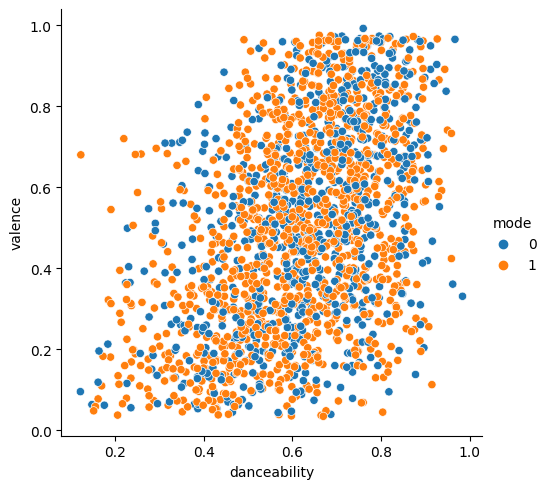

In [96]:
sns.relplot(data=data1, x="danceability", y="valence", hue="mode")

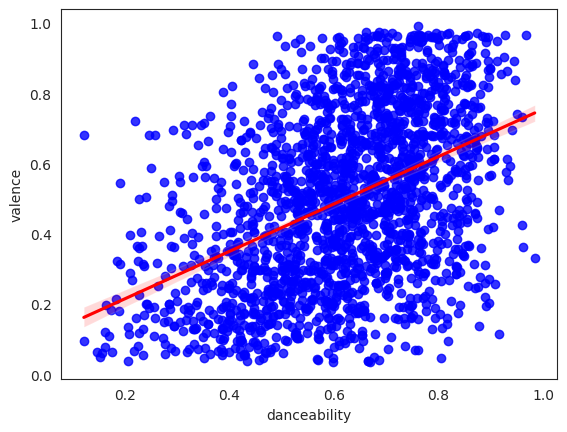

In [122]:
sns.regplot(x="danceability", y="valence", data=data1, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.set_style("white")



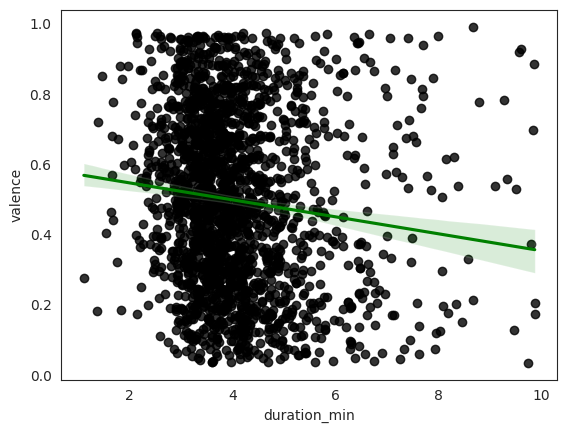

In [124]:
sns.regplot(x="duration_min", y="valence", data=data1, scatter_kws={"color": "black"}, line_kws={"color": "green"})
sns.set_style("white")

We can observe a really weak negative relationship. For every one-unit increase in song duration, the song valence decreases ever so slightly


Answer and Comments to my research question: 

The aim was to investigate whether we can predict the valence score of a song 
In the framework of normal linear models, I constructed to simple linear regression models:
1.) model1: response variable = valence , single continuous predictor: danceability

2.) model2: response variable = valence , single continuous predictor: duration_min

However, the predictive value of both models is relatively low as indicated by the low coefficients of determination (R2 = ~ 0.1918 for model1 and R2 ~ 0.0134 for model2).
These weak model fits can also be observed in the two scatterplots depicted above.

It would be interesting to see whether a more complex model (including more/other predictors)is able to better account for the variance in the valence scores.



# 10.&nbsp;Data Exporting